# Customer Segmentation

### Objectives

Using the [Online Retail dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail) from the UCI Machine Learning Repository for exploratory data analysis, ***Customer Segmentation***, ***RFM Analysis*** and  ***Clustering*** with maschine learning unsupervised algorithms

By using coustomer segmentation, we can enable companies to develop different approaches to different customer segments so that they can get to know their customers better, observe trends better, and increase customer retention and sales revenues.
We will calculate the Recency, Frequency and Monetary values of the customers in the RFM Analysis we will make using the data consisting of UK transactions. Ultimately, we have to create an RFM table containing these values and then We will segment the customers ourselves based on their recency, frequency, and monetary values.

#### Our goal in this Notebook is to cluster the customers in our data set to:
 - Recognize who are our most valuable customers
 - Increase revenue
 - Increase customer retention
 - Learn more about the trends and behaviors of our customers
 - Define customers that are at risk


# Project Structures

- Data Description 
- Data Pre-Processing
- Exploratory Data Analysis
- Customer Segmentation with Clustering
- Key Findings
- Conclusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#
from sklearn.preprocessing import MinMaxScaler
#
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
#
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path = 'data/Online Retail.csv'
df = pd.read_csv(data_path)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


# Data Description :
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


**InvoiceNo**: Invoice number. *Nominal*, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
<br>
**StockCode**: Product (item) code. *Nominal*, a 5-digit integral number uniquely assigned to each distinct product.
<br>
**Description**: Product (item) name. *Nominal*. 
<br>
**Quantity**: The quantities of each product (item) per transaction. *Numeric*.
<br>
**InvoiceDate**: Invoice Date and time. *Numeric*, the day and time when each transaction was generated.
<br>
**UnitPrice**: Unit price. *Numeric*, Product price per unit in sterling.
<br>
**CustomerID**: Customer number. *Nominal*, a 5-digit integral number uniquely assigned to each customer.
<br>
**Country**: Country name. *Nominal*, the name of the country where each customer resides.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Data Pre-Processing

In [4]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.InvoiceDate = df.InvoiceDate.astype('datetime64[D]')
df.InvoiceDate

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-12-09
541905   2011-12-09
541906   2011-12-09
541907   2011-12-09
541908   2011-12-09
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [7]:
df_group = df.groupby('InvoiceNo')
df_group[['Quantity', 'UnitPrice']].count()

,Quantity,UnitPrice
InvoiceNo,,
536365,7,7
536366,2,2
536367,12,12
536368,4,4
536369,1,1
...,...,...
C581484,1,1
C581490,2,2
C581499,1,1


#### Drop Null customer ID's

In [8]:
df.dropna(subset=['CustomerID'], inplace=True)
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


##### Record with minus Quantity

In [10]:
df[df['Quantity']<0].shape[0]

8905

##### Record with Invoice Id contain `C` character

In [11]:
df[(df['InvoiceNo'].str.contains('C')) & (df['Quantity']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09,1.25,17315.0,United Kingdom


In [12]:
df[(df['InvoiceNo'].str.contains('C')) & (df['Quantity']>0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


- We see all records with InvoiceId contain `C` have have Quantity less than zero

- The orders which canceled have minus Quantity

#### Check for duplicated records

In [13]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09,2.10,14446.0,United Kingdom


Find Duplicated Records

In [14]:
df.duplicated().sum()

5226

Drop duplicated records

In [15]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

#### Drop prdoduct with 0 unit price

In [16]:
unitprice_0 = df[df.UnitPrice==0].index
df.drop(unitprice_0, inplace=True)
df[df.UnitPrice==0].index

Int64Index([], dtype='int64')

# Exploratory Analysis

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [18]:
df.groupby(['CustomerID', 'InvoiceNo']).count()

StockCode  Description  Quantity  InvoiceDate  \
CustomerID InvoiceNo                                                  
12346.0    541431             1            1         1            1   
           C541433            1            1         1            1   
12347.0    537626            31           31        31           31   
           542237            29           29        29           29   
           549222            24           24        24           24   
...                         ...          ...       ...          ...   
18283.0    579673            50           50        50           50   
           580872            50           50        50           50   
18287.0    554065            29           29        29           29   
           570715            38           38        38           38   
           573167             3            3         3            3   

                      UnitPrice  Country  
CustomerID InvoiceNo                      
12346.0    541431             1        1  
           C541433            1        1  
12347.0    537626            31       31  
           542237            29       29  
           549222            24       24  
...                         ...      ...  
18283.0    579673            50       50  
           580872            50       50  
18287.0    554065            29       29  
           570715            38       38  
           573167             3        3  

[22186 rows x 6 columns]

In [19]:
df.groupby('CustomerID')['InvoiceNo'].count().sort_values(ascending=False)

CustomerID
17841.0    7812
14911.0    5896
14096.0    5128
12748.0    4458
14606.0    2759
           ... 
16323.0       1
13302.0       1
16428.0       1
13270.0       1
13307.0       1
Name: InvoiceNo, Length: 4371, dtype: int64

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [21]:
df.CustomerID = df.CustomerID.astype('int64')
df.describe().round()

,Quantity,UnitPrice,CustomerID
count,401563.0,401563.0,401563.0
mean,12.0,3.0,15281.0
std,250.0,70.0,1714.0
min,-80995.0,0.0,12346.0
25%,2.0,1.0,13939.0
50%,5.0,2.0,15145.0
75%,12.0,4.0,16788.0
max,80995.0,38970.0,18287.0


- Group by Country

In [22]:
country_df = df.groupby('Country')
country_df = country_df.count().sort_values(by='CustomerID', ascending=False)
country_df.T.head(1)

Country,United Kingdom,Germany,France,EIRE,Spain,Netherlands,Belgium,Switzerland,Portugal,Australia,...,Malta,United Arab Emirates,European Community,RSA,Lebanon,Lithuania,Brazil,Czech Republic,Bahrain,Saudi Arabia
InvoiceNo,356703,9478,8474,7473,2527,2367,2069,1876,1471,1255,...,127,68,61,57,45,35,32,30,17,10


- We see the UK has the most customers. Since the majority of this data set contains orders from the UK, we can explore the UK market further by finding out what products the customers buy together and any other buying behaviors to improve our sales and targeting strategy.

In [23]:
uk_df = df[df['Country']=='United Kingdom']
uk_df.describe().round()

,Quantity,UnitPrice,CustomerID
count,356703.0,356703.0,356703.0
mean,11.0,3.0,15544.0
std,264.0,71.0,1594.0
min,-80995.0,0.0,12346.0
25%,2.0,1.0,14191.0
50%,4.0,2.0,15513.0
75%,12.0,4.0,16931.0
max,80995.0,38970.0,18287.0


- Drop Canceled Orders

In [24]:
f"Total canceled orders: {(uk_df['Quantity']<0).sum()}"

'Total canceled orders: 7501'

In [25]:
uk_df = uk_df[uk_df.Quantity>0]
uk_df.drop('Country', axis=1, inplace=True)
uk_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850


In [26]:
uk_df.describe().round()

,Quantity,UnitPrice,CustomerID
count,349202.0,349202.0,349202.0
mean,12.0,3.0,15548.0
std,191.0,18.0,1594.0
min,1.0,0.0,12346.0
25%,2.0,1.0,14191.0
50%,4.0,2.0,15518.0
75%,12.0,4.0,16931.0
max,80995.0,8143.0,18287.0


- Create `Total Price` column

In [27]:
uk_df['Total_price'] = uk_df['Quantity']*uk_df['UnitPrice']

## Create RFM Profile for Customers 

In [28]:
last_date = uk_df.InvoiceDate.max()
last_date += pd.Timedelta(1,'d')
last_date

Timestamp('2011-12-10 00:00:00')

In [29]:
uk_df.drop(['StockCode', 'Description', 'Quantity', 'UnitPrice'], axis=1, inplace=True)
uk_df.head()

,InvoiceNo,InvoiceDate,CustomerID,Total_price
0,536365,2010-12-01,17850,15.30
1,536365,2010-12-01,17850,20.34
2,536365,2010-12-01,17850,22.00
3,536365,2010-12-01,17850,20.34
4,536365,2010-12-01,17850,20.34


In [30]:
uk_agg = uk_df.groupby('CustomerID').agg({'InvoiceDate' :'max',
                                          'CustomerID' : 'count',
                                          'Total_price':'sum'})
uk_agg.head()                                          

,InvoiceDate,CustomerID,Total_price
CustomerID,,,
12346,2011-01-18,1,77183.60
12747,2011-12-07,103,4196.01
12748,2011-12-09,4412,33053.19
12749,2011-12-06,199,4090.88
12820,2011-12-06,59,942.34


In [31]:
uk_agg['Recency'] = uk_agg['InvoiceDate'].apply(lambda x : last_date-x ).dt.days

In [32]:
uk_agg.head()

,InvoiceDate,CustomerID,Total_price,Recency
CustomerID,,,,
12346,2011-01-18,1,77183.60,326
12747,2011-12-07,103,4196.01,3
12748,2011-12-09,4412,33053.19,1
12749,2011-12-06,199,4090.88,4
12820,2011-12-06,59,942.34,4


In [33]:
rfm_df= uk_agg.copy()
rfm_df.drop('InvoiceDate', axis=1, inplace=True)
rfm_df.rename(columns={'CustomerID':'frequency', 'Total_price':'monetary'}, inplace=True)
rfm_df.head()

,frequency,monetary,Recency
CustomerID,,,
12346,1,77183.60,326
12747,103,4196.01,3
12748,4412,33053.19,1
12749,199,4090.88,4
12820,59,942.34,4


In [34]:
rfm_df.describe()

,frequency,monetary,Recency
count,3920.000000,3920.000000,3920.000000
mean,89.082143,1858.423659,92.742092
std,214.033382,7478.630118,99.533485
min,1.000000,3.750000,1.000000
25%,17.000000,298.185000,18.000000
50%,40.000000,644.975000,51.000000
75%,98.000000,1571.285000,143.000000
max,7676.000000,259657.300000,374.000000


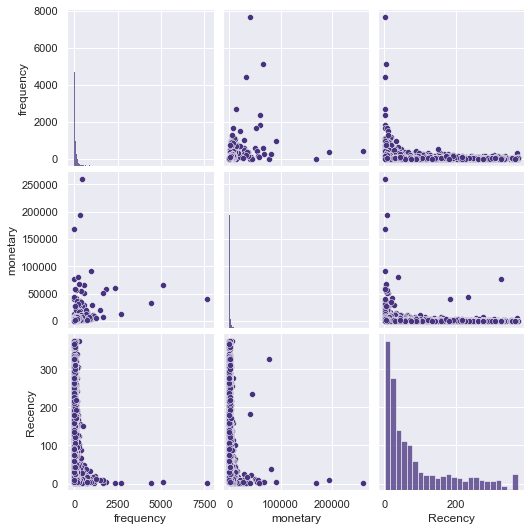

In [35]:
sns.set_theme(context='notebook', palette='viridis')
sns.pairplot(rfm_df)
plt.show()

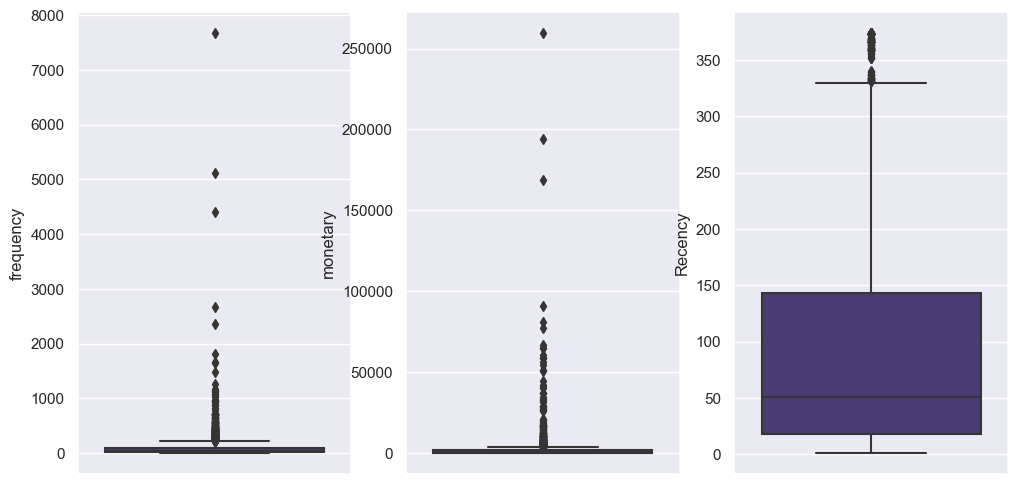

In [36]:
fig, ax = plt.subplots(1,3, figsize=(12,6))
for i, x in enumerate(rfm_df.columns):
    sns.boxplot(data=rfm_df, y=x, ax=ax[i])
    ax[i].set_ylabel(x)

#### Outlier detection

In [37]:
def outlier(df):
    q1 = df.quantile(.25)
    q3 = df.quantile(.75)
    IQR = (q3-q1)
    out_up = q3 + IQR*1.5
    out_dw = q1 - IQR*1.5
    indexs = df[~((df>out_dw) & (df<out_up))].index
    return indexs

In [38]:
freq_out = outlier(rfm_df['frequency'])
monetary_out = outlier(rfm_df['monetary'])
recency_out = outlier(rfm_df['Recency'])

In [39]:
print(f'Number of frequency outliers : {len(freq_out)}')
print(f'Number of monetary outliers : {len(monetary_out)}')
print(f'Number of Recency outliers : {len(recency_out)}')

Number of frequency outliers : 340
Number of monetary outliers : 381
Number of Recency outliers : 133


In [40]:
set.intersection(set(freq_out), set(monetary_out), set(recency_out))

{17850}

In [41]:
freq_mon_out = set.intersection(set(freq_out), set(monetary_out))

In [42]:
print(f'Number of frequency & monetary outliers : {len(freq_mon_out)}')

Number of frequency & monetary outliers : 204


In [43]:
best_rfm = rfm_df[~rfm_df.index.isin(freq_mon_out)]

In [44]:
mon_out = best_rfm.sort_values(by='monetary', ascending=False)[:15].index

In [45]:
freq_mon_out = freq_mon_out.union(set(mon_out))

In [46]:
len(freq_mon_out)

219

Drop outliers and create new data frame

In [47]:
best_rfm = rfm_df[~rfm_df.index.isin(freq_mon_out)]

In [48]:
best_rfm

,frequency,monetary,Recency
CustomerID,,,
12747,103,4196.01,3
12749,199,4090.88,4
12820,59,942.34,4
12821,6,92.72,215
12822,46,948.88,71
...,...,...,...
18280,10,180.60,278
18281,7,80.82,181
18282,12,178.05,8


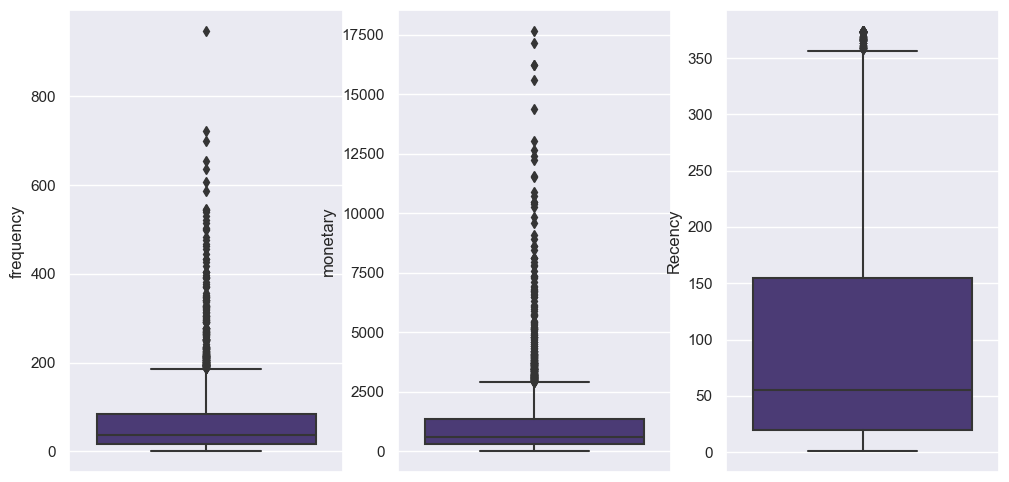

In [49]:
fig, ax = plt.subplots(1,3, figsize=(12,6))
for i, x in enumerate(best_rfm.columns):
    sns.boxplot(data=best_rfm, y=x, ax=ax[i])
    ax[i].set_ylabel(x)

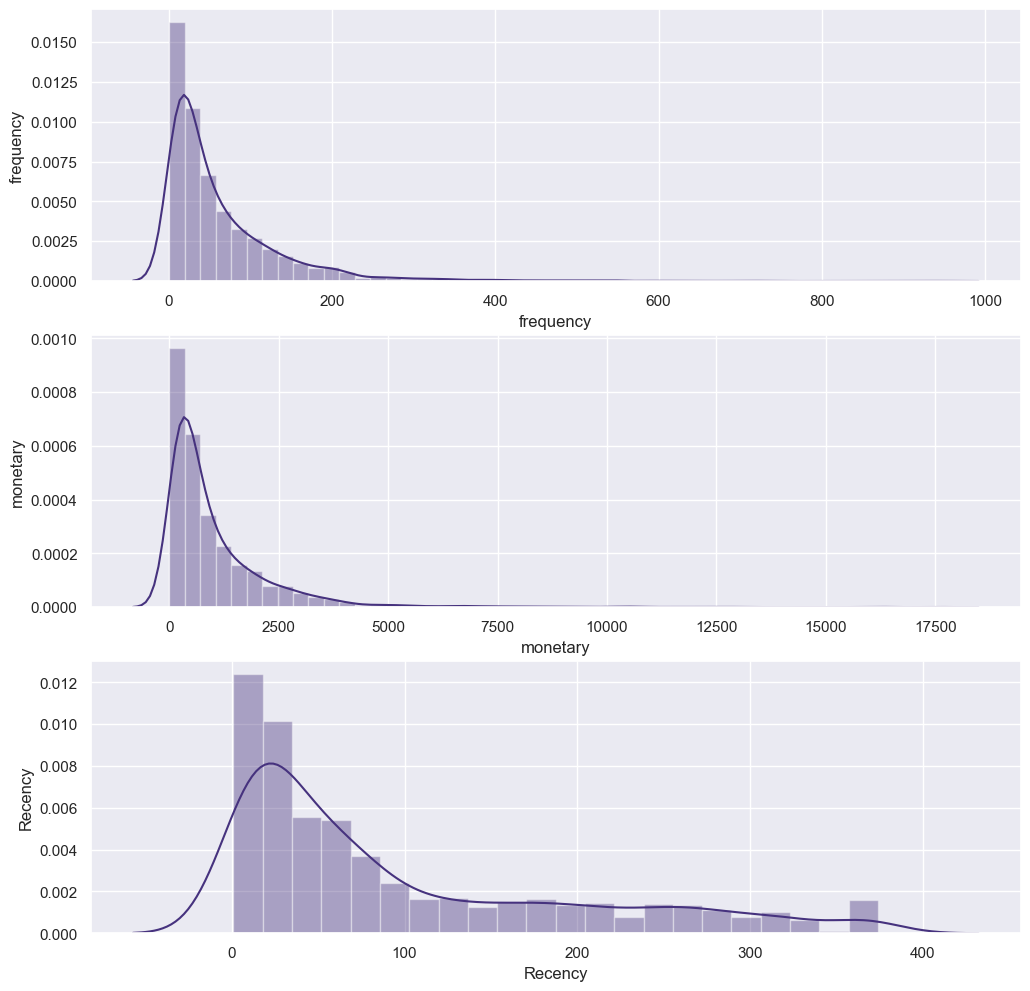

In [50]:
fig, ax = plt.subplots(3,1, figsize=(12,12))
for i, x in enumerate(best_rfm.columns):
    sns.distplot(best_rfm[x], ax=ax[i])
    ax[i].set_ylabel(x)

- Data is very skewed and it is best practice using of natural log for transformation

In [51]:
rfm_log = np.log(best_rfm)

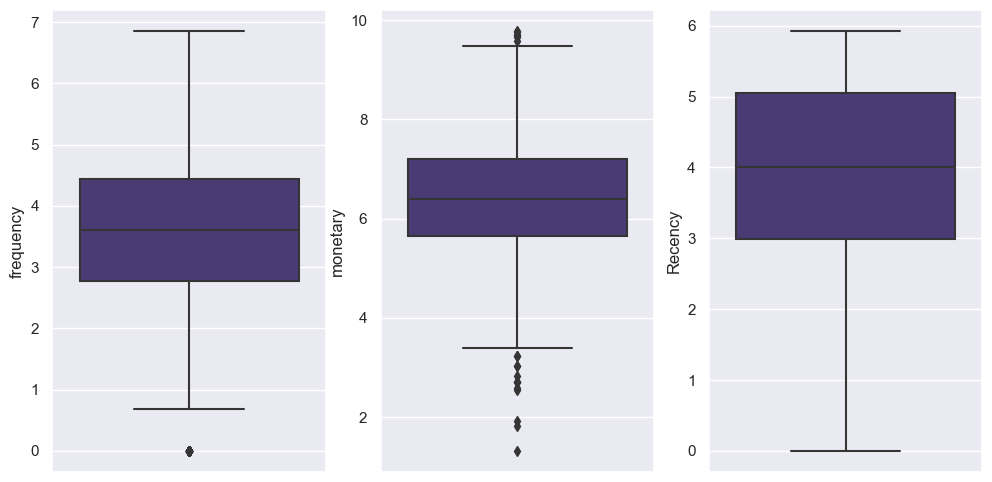

In [52]:
fig, ax = plt.subplots(1,3, figsize=(12,6))
for i, x in enumerate(rfm_log.columns):
    sns.boxplot(data=rfm_log, y=x, ax=ax[i])
    ax[i].set_ylabel(x)

# It's OK

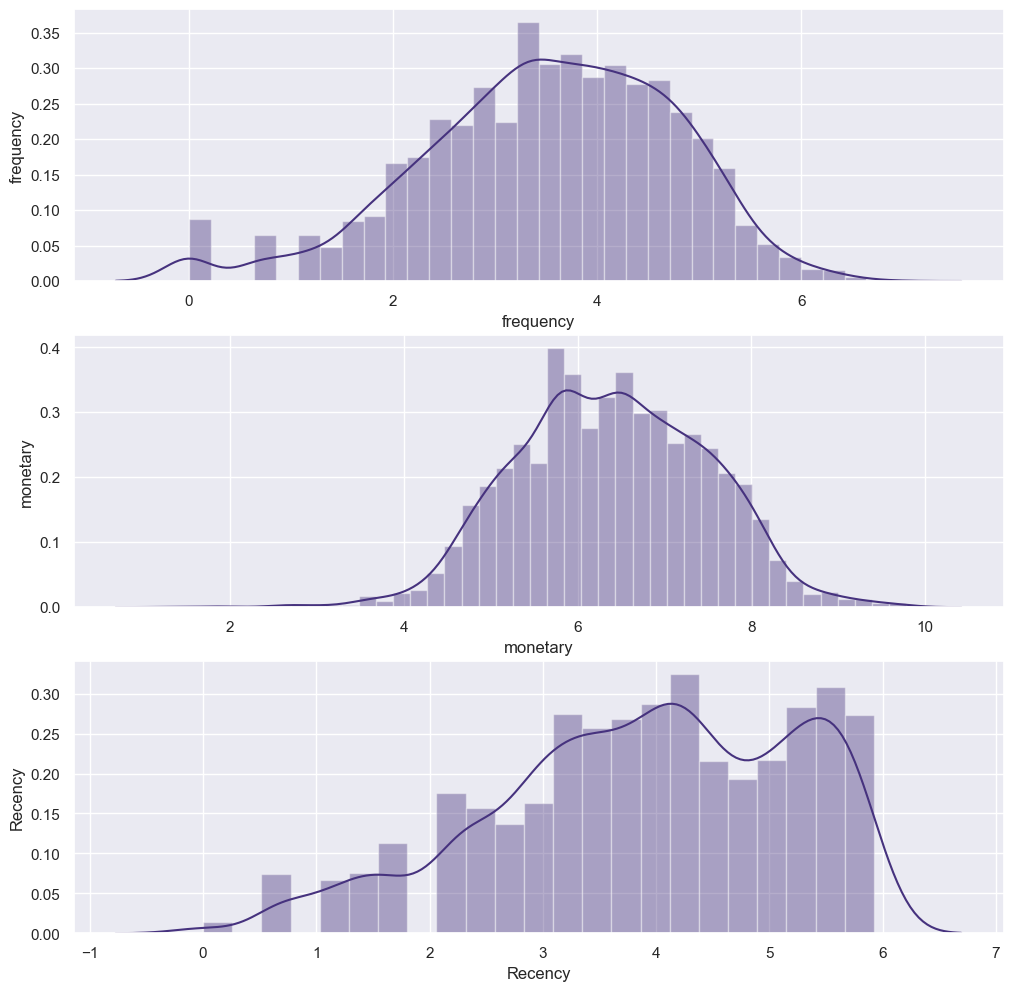

In [53]:
fig, ax = plt.subplots(3,1, figsize=(12,12))
for i, x in enumerate(rfm_log.columns):
    sns.distplot(rfm_log[x], ax=ax[i])
    ax[i].set_ylabel(x)

# Clustering

In [54]:
scaler = MinMaxScaler()
scal_rfm = scaler.fit_transform(rfm_log)

- We scale Recency with inverse scaling method

In [55]:
def inverse_scale(df):   
    scal_X = (df.max(axis=0)-df) / (df.max(axis=0) - df.min(axis=0))
    return scal_X

In [56]:
scal_rfm[:,2] = inverse_scale(rfm_log['Recency']).values

In [57]:
scal_rfm

array([[0.67627706, 0.83009812, 0.81455691],
       [0.77237324, 0.82709777, 0.76599688],
       [0.59497439, 0.65349595, 0.76599688],
       ...,
       [0.36258547, 0.45646353, 0.64899531],
       [0.96021479, 0.74514154, 0.76599688],
       [0.61991972, 0.73244546, 0.36511855]])

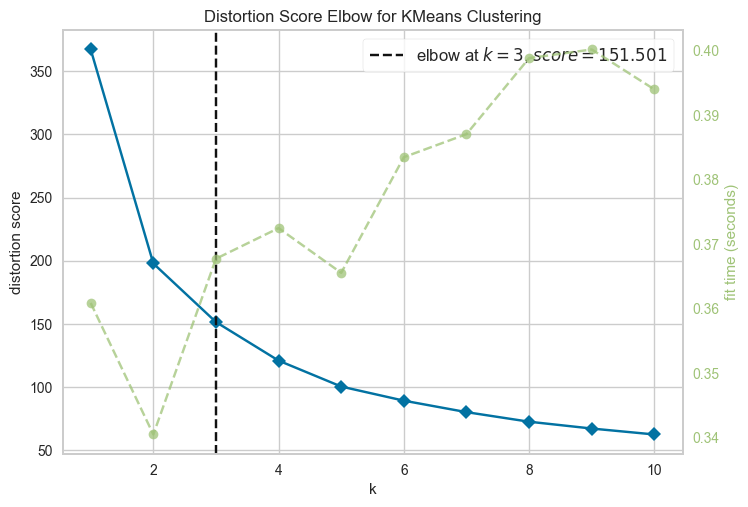

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,11))
visu.fit(scal_rfm)
visu.poof()

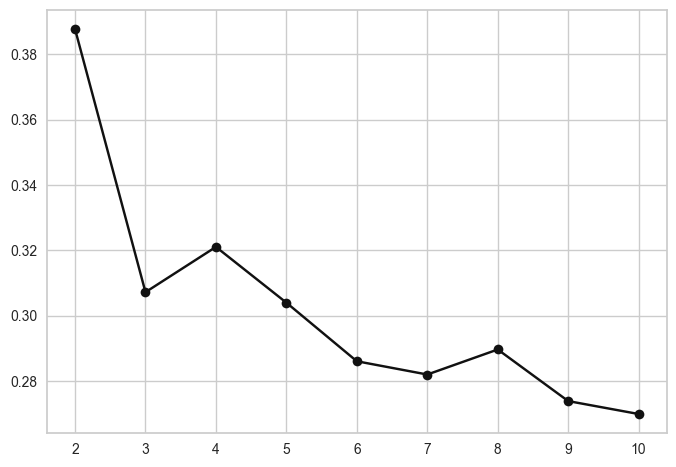

In [59]:
sil_score = []
for n in range(2, 11):

    kmeans = KMeans(n_clusters= n, random_state=123)
    kmeans.fit(scal_rfm)
    labels = kmeans.predict(scal_rfm)
    clus_sil = silhouette_score(scal_rfm, labels)
    sil_score.append(clus_sil)

plt.plot(list(range(2,11)), sil_score, marker='o', c='k')
plt.xticks(list(range(2,11)));

#### With `K=3` Create KMeans clustering model

In [60]:
kmeans = KMeans(n_clusters= 3, random_state=123)
kmeans.fit(scal_rfm)
km_labels = kmeans.predict(scal_rfm)
km_df = pd.DataFrame(scal_rfm, columns=best_rfm.columns, index=best_rfm.index)
km_df['KM_Cluster'] = km_labels
km_df.head()

,frequency,monetary,Recency,KM_Cluster
CustomerID,,,,
12747,0.676277,0.830098,0.814557,0
12749,0.772373,0.827098,0.765997,0
12820,0.594974,0.653496,0.765997,0
12821,0.261445,0.379311,0.093449,1
12822,0.558657,0.654314,0.280470,2


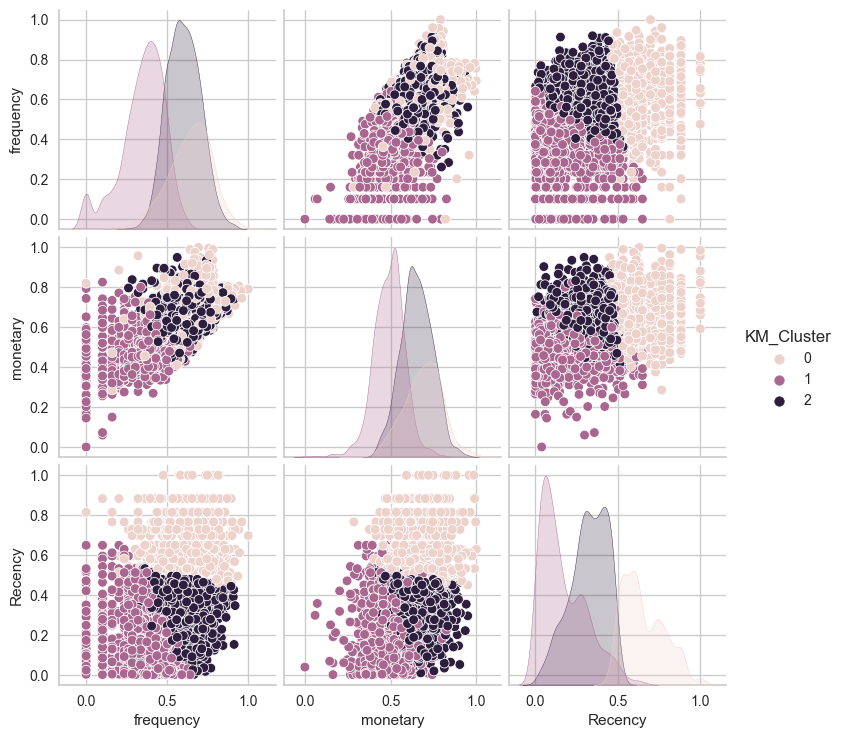

In [61]:
sns.pairplot(km_df, hue='KM_Cluster');

### Visualize with PCA

In [62]:
pca = PCA(n_components=2)
km_pca = pca.fit_transform(km_df.iloc[:,:-1])
pca.explained_variance_ratio_

array([0.68564035, 0.25351217])

In [63]:
km_pca_df = pd.DataFrame(km_pca, columns=['p1', 'p2'])
km_pca_df['KM_Cluster'] = km_labels
km_pca_df.head()

,p1,p2,KM_Cluster
0,0.531500,0.108591,0
1,0.544647,0.014443,0
2,0.387322,0.198098,0
3,-0.403931,0.091069,1
4,-0.003052,-0.090342,2


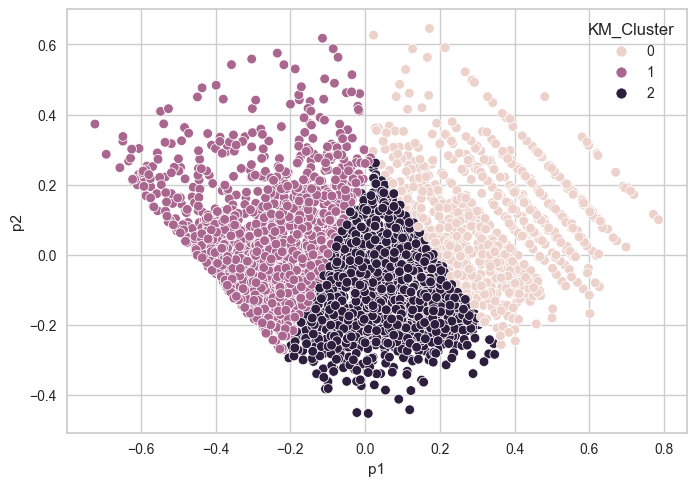

In [64]:
sns.scatterplot(x='p1', y='p2', data=km_pca_df, hue='KM_Cluster');

## Agglomerative algorithm

In [65]:
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward', compute_full_tree=True)
agglo.fit(scal_rfm)
aglo_label = agglo.fit_predict(scal_rfm)
aglo_df = pd.DataFrame(scal_rfm, columns=best_rfm.columns, index=best_rfm.index)
aglo_df['Agg_Cluster'] = aglo_label
aglo_df.head()

,frequency,monetary,Recency,Agg_Cluster
CustomerID,,,,
12747,0.676277,0.830098,0.814557,2
12749,0.772373,0.827098,0.765997,2
12820,0.594974,0.653496,0.765997,2
12821,0.261445,0.379311,0.093449,0
12822,0.558657,0.654314,0.280470,1


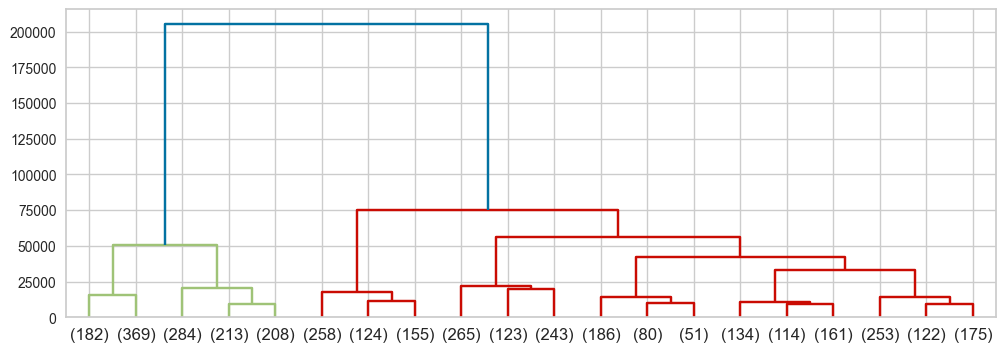

In [66]:
from scipy.cluster import hierarchy
#
z = hierarchy.linkage(agglo.children_, method='ward')

fig, ax = plt.subplots(figsize=(12, 4))
den = hierarchy.dendrogram(z, orientation='top',
                           p=20, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax)

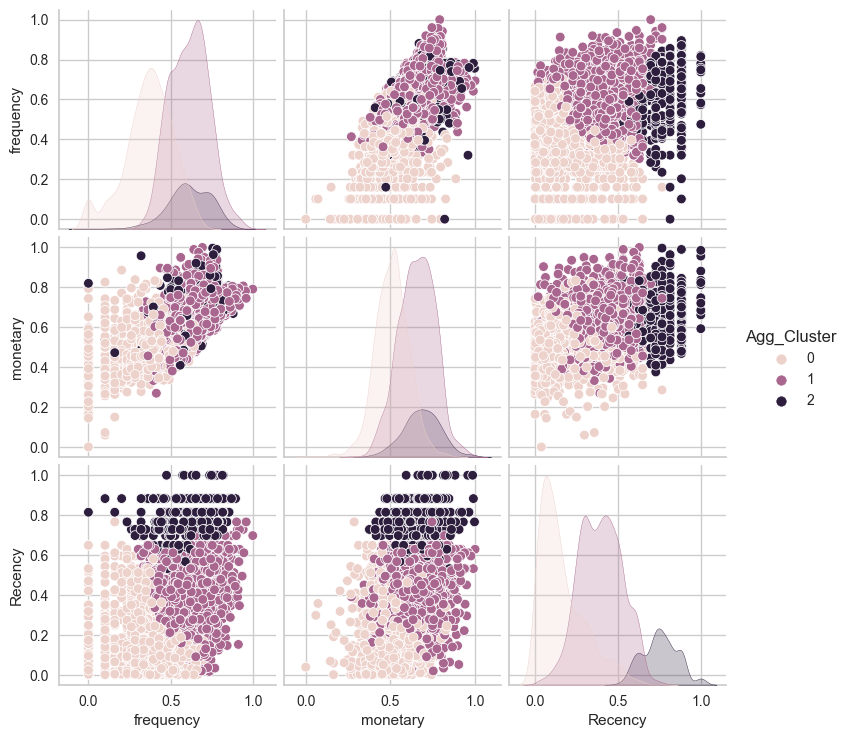

In [67]:
sns.pairplot(aglo_df, hue='Agg_Cluster');

#### We see KMeans with `k=3` have beter performance on culstering the customers

- Create final Data frame with labeled customers

In [68]:
best_rfm['cluster'] = km_labels
best_rfm.head()

,frequency,monetary,Recency,cluster
CustomerID,,,,
12747,103,4196.01,3,0
12749,199,4090.88,4,0
12820,59,942.34,4,0
12821,6,92.72,215,1
12822,46,948.88,71,2


In [69]:
cluster_df = best_rfm.groupby('cluster').agg({'frequency':['sum', 'mean'],
                                             'monetary':['sum', 'mean'],
                                             'Recency':['mean', 'count']}).round()
cluster_df

frequency          monetary         Recency      
              sum   mean        sum    mean    mean count
cluster                                                  
0           99721  115.0  1688462.0  1945.0    10.0   868
1           21258   15.0   438479.0   315.0   179.0  1392
2          113815   79.0  1804742.0  1252.0    71.0  1441

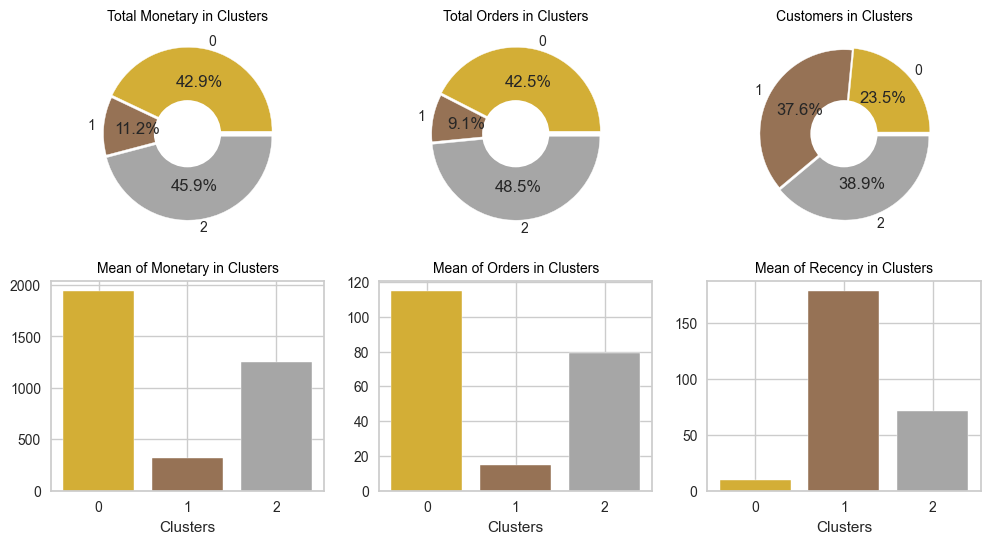

In [70]:
color = ['#D3AE36','#967255','#A6A6A6']
fig, ax = plt.subplots(2,3, figsize=(12,6))

ax[0][0].pie(cluster_df[('monetary', 'sum')], colors=color, radius=1, autopct='%1.1f%%', explode=[.03, 0, .03], labels=[0,1,2])
ax[0][0].add_artist(plt.Circle((0,0), 0.4, color='white', fc='white', linewidth=0))
ax[0][0].set_title('Total Monetary in Clusters', color='black',fontsize=10)
#
ax[1][0].bar(x=cluster_df.index, height=cluster_df[('monetary', 'mean')], color=color)
ax[1][0].set_title('Mean of Monetary in Clusters', color='black',fontsize=10)
ax[1][0].set_xlabel('Clusters')
##
ax[0][1].pie(cluster_df[('frequency', 'sum')], colors=color, radius=1, autopct='%1.1f%%', explode=[.03, 0, .03], labels=[0,1,2])
ax[0][1].add_artist(plt.Circle((0,0), 0.4, color='white', fc='white', linewidth=0))
ax[0][1].set_title('Total Orders in Clusters', color='black',fontsize=10)
#
ax[1][1].bar(x=cluster_df.index, height=cluster_df[('frequency', 'mean')], color=color)
ax[1][1].set_title('Mean of Orders in Clusters', color='black',fontsize=10)
ax[1][1].set_xlabel('Clusters')
##
ax[0][2].pie(cluster_df[('Recency', 'count')], colors=color, radius=1, autopct='%1.1f%%', explode=[.03, 0, .03], labels=[0,1,2])
ax[0][2].add_artist(plt.Circle((0,0), 0.4, color='white', fc='white', linewidth=0))
ax[0][2].set_title('Customers in Clusters', color='black',fontsize=10)
#
ax[1][2].bar(x=cluster_df.index, height=cluster_df[('Recency', 'mean')], color=color)
ax[1][2].set_title('Mean of Recency in Clusters', color='black',fontsize=10)
ax[1][2].set_xlabel('Clusters')

plt.show()

# Key Findings
With exploratory analysis of clusters distribution we can find three type of customers :
- Cluster `0`, customers who is in cluster have highest monetary and orders with lowest recency so we can call them golden customers
- Cluster `1`, customers who is in cluster have lowest monetary and orders with highest recency so we can call them almost lost customers.Therefore, this group of customers has the highest risk of churning, so we need to focus on this group of customers and work to improve their satisfaction
- Cluster `2`, customers who is in cluster have midlle monetary and orders with high recency so we can call them silver customers


# Canclusion

Businesses have this ever-lasting urge to understand their customers. The better you understand the customer, the better you serve them, and the higher the financial gain you receive from that customer. Since the dawn of trade, this process of understanding customers for a strategic gain has been there practiced and this task is known majorly as **Customer Segmentation**

Well as the name suggests, Customer Segmentation could segment customers according to their precise needs. In this project we segment customers only with their values based on their Recency-Frequency-Monatory data, **also for improve the clustering model performance and better segmentatin of customers we can add customers demographics, behavioral, Psychographic, Geographic data like gender, region, country, etc, to model**